# **Libraries**

In [1]:
from google.colab import drive  # Access Google Drive in Google Colab
import zipfile  # Handle zip files
import os  # Interact with the operating system
import matplotlib.pyplot as plt  # Create visualizations, graphs, and plots
import matplotlib.image as mpimg  # Read and manipulate images
import cv2  # Image and video manipulation using OpenCV
import shutil  # File and directory operations, like deletion or moving
from keras.preprocessing.image import ImageDataGenerator  # Perform data augmentation on images
import tensorflow as tf  # Main library for numerical computations using ML and DL algorithms
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Layers used in NN models
from tensorflow.keras.optimizers import SGD  # SGD optimizer used in model training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks used in model training
from tensorflow.keras.regularizers import l2  # L2 regularizer to reduce overfitting
from google.colab import files  # Upload and download files in Colab
import numpy as np  # Array operations and numerical computations
import pandas as pd  # Data analysis and dataset manipulation
from keras.preprocessing import image  # Preprocess images before feeding them to the model
from tensorflow.keras.applications.xception import preprocess_input  # Preprocess input for Xception model
import seaborn as sns  # Data visualization library
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for machine learning models
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# **Preparing Dataset**

## **Load Dataset**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to file ZIP in Google Drive
zip_path = '/content/drive/MyDrive/capstone_botaniscan/corn_color.zip'

Mounted at /content/drive


In [ ]:
# Extract zip file
! unzip "/content/drive/MyDrive/capstone_botaniscan/corn_color.zip" -d .

## **Classes**

In [ ]:
corn_data = "/content/corn_color"
corn_classes = os.listdir(corn_data)

In [ ]:
print("Corn Classes:")
for classes in corn_classes:
    if os.path.isdir(os.path.join(corn_data, classes)):
        print(classes)

Corn Classes:
Corn_Common_Rust
Not_Corn
Corn_Healthy
Corn_Northern_Leaf_Blight
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot


## **Preview Image Dataset**


Corn_Common_Rust
Total Images: 1000
Resolution of First Image: (256, 256, 3)


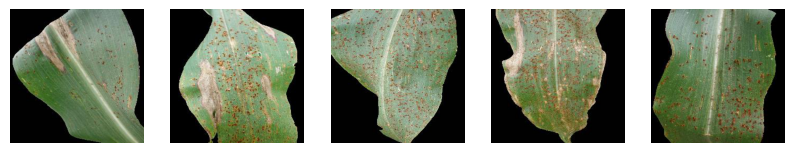


Not_Corn
Total Images: 1000
Resolution of First Image: (256, 382, 3)


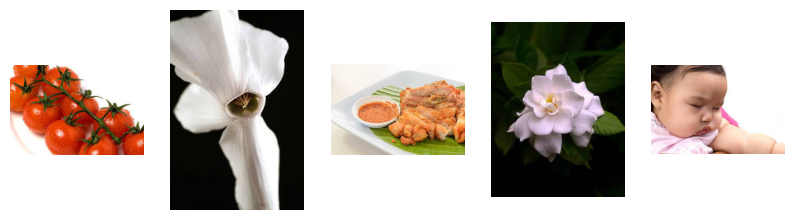


Corn_Healthy
Total Images: 1000
Resolution of First Image: (256, 256, 3)


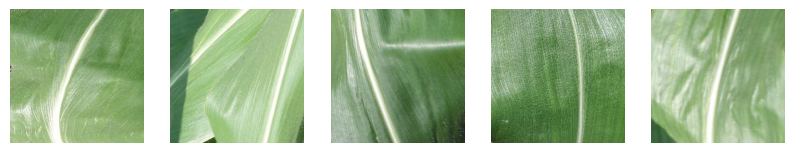


Corn_Northern_Leaf_Blight
Total Images: 985
Resolution of First Image: (256, 256, 3)


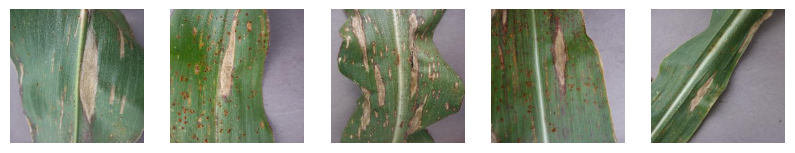


Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot
Total Images: 513
Resolution of First Image: (256, 256, 3)


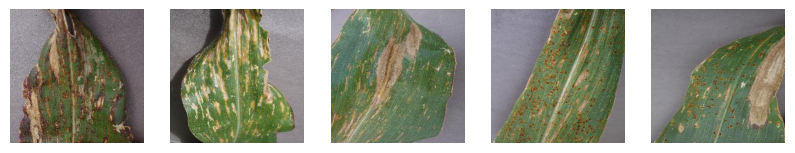

In [ ]:
for item in corn_classes:
  print("")
  print(item)
  class_dir = os.path.join(corn_data, item)
  class_images = os.listdir(class_dir)
  
  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)
  
  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)
  
  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

## **Preprocessing Dataset**

In [ ]:
not_corn_dir = os.path.join(corn_data, "Not_Corn")
not_corn_images = os.listdir(not_corn_dir)

for img_path in not_corn_images:
    img = cv2.imread(os.path.join(not_corn_dir, img_path))
    resized_img = cv2.resize(img, (256, 256))
    cv2.imwrite(os.path.join(not_corn_dir, img_path), resized_img)

Not_Corn
Jumlah gambar: 1000
Resolusi/Ukuran gambar pertama: (256, 256, 3)


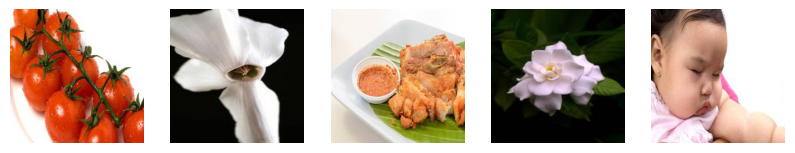

In [ ]:
not_tomato_dir = os.path.join(corn_data, "Not_Corn")
not_tomato_images = os.listdir(not_tomato_dir)

print("Not_Corn")
num_images = len(not_corn_images)
print("Jumlah gambar:", num_images)

# Displays the resolution/size of the first image in class
img_path = os.path.join(not_corn_dir, not_corn_images[0])
img = mpimg.imread(img_path)
image_shape = img.shape
print("Resolusi/Ukuran gambar pertama:", image_shape)

# Shows some sample images
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(not_corn_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(not_corn_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
plt.show()


In [ ]:
output_dir = "/content/corn_color/Not_Corn_Clean"
os.makedirs(output_dir, exist_ok=True)

not_corn_dir = os.path.join(corn_data, "Not_Corn")
not_tomato_images = os.listdir(not_corn_dir)

for img_path in not_corn_images:
    img = cv2.imread(os.path.join(not_corn_dir, img_path))
    resized_img = cv2.resize(img, (256, 256))
    output_path = os.path.join(output_dir, img_path)
    cv2.imwrite(output_path, resized_img)

In [ ]:
# Deleting folder

# import shutil
# folder_path = "/content/corn_color/not_corn_clean"
# Menghapus folder beserta isinya
# shutil.rmtree(folder_path)

In [ ]:
corn_data_new = "/content/corn_color"
corn_classes = os.listdir(corn_data_new)

# Excluded the "not_tomato" folder from tomato_classes
if "Not_Corn" in corn_classes:
    corn_classes.remove("Not_Corn")

print("Corn Classes:")
for corn_class in corn_classes:
    if os.path.isdir(os.path.join(corn_data_new, corn_class)):
        print(corn_class)

Corn Classes:
Corn_Common_Rust
Not_Corn_Clean
Corn_Healthy
Corn_Northern_Leaf_Blight
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot


## **Rename Images as Folder Names**

In [ ]:
for corn_class in corn_classes:
    class_dir = os.path.join(corn_data_new, corn_class)
    if os.path.isdir(class_dir):
        file_list = os.listdir(class_dir)
        for i, file_name in enumerate(file_list):
            file_path = os.path.join(class_dir, file_name)
            new_file_name = f"{corn_class}_{i+1}.jpg"
            new_file_path = os.path.join(class_dir, new_file_name)
            os.rename(file_path, new_file_path)

## **Save Final Dataset**

In [ ]:
# The name of the directory to be zipped
source_dir = "/content/corn_color"

# The name of the zip file to be created
zip_file_name = "corn_data_final.zip"

# Create a new zip object
zip_file = zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED)

# Recursively add files into zip
for folder_name, subfolders, filenames in os.walk(source_dir):
    if os.path.basename(folder_name) != "Not_Corn":
        for filename in filenames:
            file_path = os.path.join(folder_name, filename)
            # Add the files into the zip with the same directory structure
            zip_file.write(file_path, os.path.relpath(file_path, source_dir))

# Closing the zip file when finished
zip_file.close()

print("Dataset succesfully zipped to:", zip_file_name)

Dataset succesfully zipped to: corn_data_final.zip


# **Building Detection Model**

## **Importing New Dataset**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Extract zip file
! unzip "/content/drive/MyDrive/capstone_botaniscan/corn_data_final.zip" -d .


zip_file_path = '/content/drive/MyDrive/capstone_botaniscan/corn_data_final.zip'  # The path to the zip file
target_folder = '/content/finaldata'  # Path to destination folder

# Extract the zip file to the destination folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [ ]:
finaldata_dir = "/content/finaldata"
img_dim = 256
img_shape = (256, 256, 3)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.15,
    rotation_range=20,  # Image rotation up to 20 degrees
    width_shift_range=0.2,  # The horizontal shift of the image is 0.2
    height_shift_range=0.2,  # The vertical shift of the image is 0.2
    shear_range=0.2,  # Image stretch by 0.2
    zoom_range=0.2,  # The image magnification is 0.2
    horizontal_flip=True,  # Image horizontal inversion
    vertical_flip=True  # Image vertical inversion
)

train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3825 images belonging to 5 classes.
Found 673 images belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot': 0,
 'Corn_Common_Rust': 1,
 'Corn_Healthy': 2,
 'Corn_Northern_Leaf_Blight': 3,
 'Not_Corn_Clean': 4}

In [ ]:
labels = ['Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot', 'Corn_Common_Rust', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Not_Corn_Clean']

name_classes = labels
num_labels = len(labels)

print("Labels: {}".format(name_classes))
print("Num labels: {}".format(num_labels))

Labels: ['Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot', 'Corn_Common_Rust', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Not_Corn_Clean']
Num labels: 5


## **Building Basic Model (Model 1)**

### **Model Architecture**

In [ ]:
# Model Definition
my_model = tf.keras.models.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(5, activation='softmax')
])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

### **Training and Evaluation of Model**

In [ ]:
# Compile Model
optimizer = SGD(learning_rate=0.001, momentum=0.9)
my_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train Model
history = my_model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate Model
test_loss, test_accuracy = my_model.evaluate(validation_generator, steps=len(validation_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
39/39 [==============================] - 1011s 26s/step - loss: 2.1196 - accuracy: 0.4094 - val_loss: 1.7038 - val_accuracy: 0.5929
Epoch 2/5
39/39 [==============================] - 1027s 26s/step - loss: 1.6618 - accuracy: 0.6063 - val_loss: 1.4107 - val_accuracy: 0.7058
Epoch 3/5
39/39 [==============================] - 1002s 26s/step - loss: 1.4447 - accuracy: 0.7043 - val_loss: 1.3557 - val_accuracy: 0.7459
Epoch 4/5
39/39 [==============================] - 959s 25s/step - loss: 1.2603 - accuracy: 0.7718 - val_loss: 1.1981 - val_accuracy: 0.7949
Epoch 5/5
7/7 [==============================] - 50s 7s/step - loss: 1.1729 - accuracy: 0.8158
Test Loss: 1.1729353666305542
Test Accuracy: 0.8157503604888916


### **Visualization of Accuracy and Loss & Confusion Matrix**

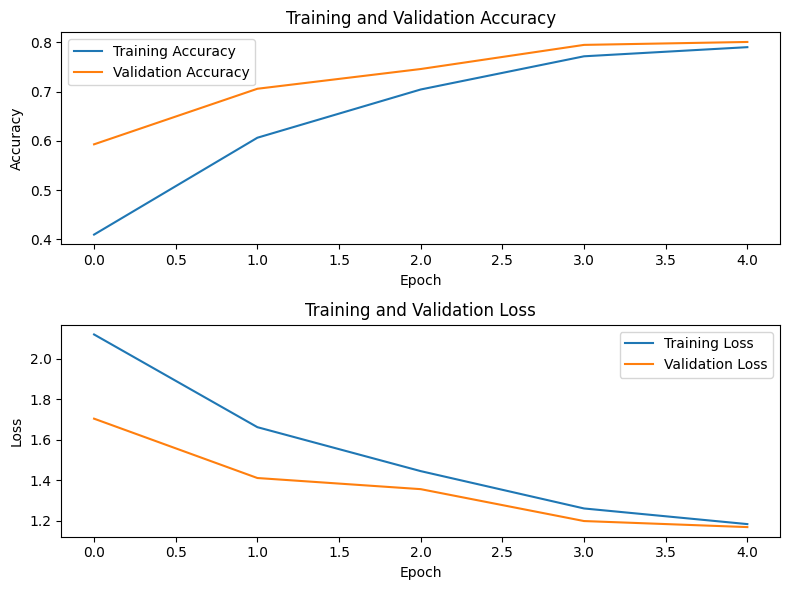

In [ ]:
# Plotting Accuracy and Loss
plt.figure(figsize=(8, 6))

# Plotting Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

<ipython-input-16-9e23b262add2>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = my_model.predict_generator(validation_generator)


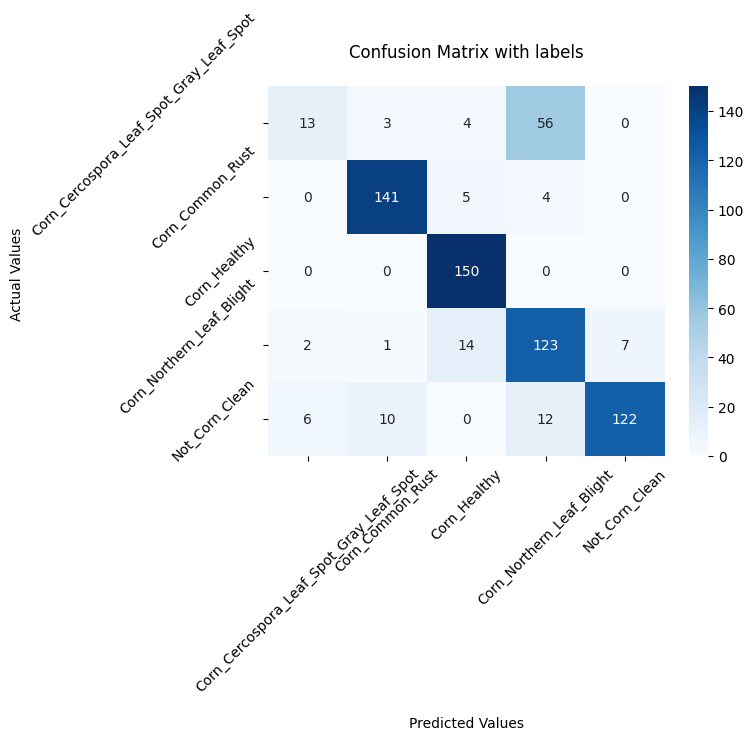

In [ ]:
# define confusion matrix method
def conf_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(name_classes, rotation=45)
  ax.yaxis.set_ticklabels(name_classes, rotation=45)

  plt.show()

y_test = validation_generator.classes
y_pred = my_model.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)
conf_matrix(y_test, y_pred)

### **Testing Prediction using Model 1**

Saving Corn_Healthy_41.jpg to Corn_Healthy_41.jpg
1/1 [==============================] - 0s 75ms/step


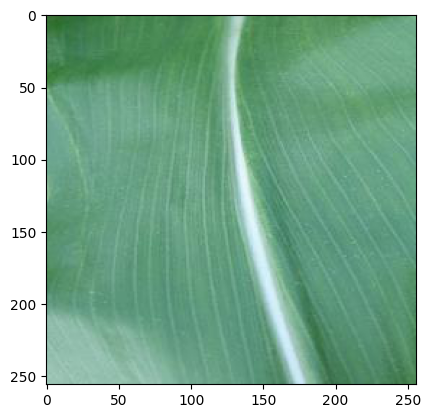

Class Predictions:
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot: 9.80%
Corn_Common_Rust: 75.37%
Corn_Healthy: 0.07%
Corn_Northern_Leaf_Blight: 3.65%
Not_Corn_Clean: 11.11%

Highest Prediction: Corn_Common_Rust: 75.37%


In [ ]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

labels = list(train_generator.class_indices.keys())
upload = files.upload()

for fn in upload.keys():
    # Image Prediction
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = my_model.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Finding the class with the highest percentage
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("Class Predictions:")
    for label, percentage in zip(labels, predictions * 100):
        print("{}: {:.2f}%".format(label, percentage))
    print("\nHighest Prediction: {}: {:.2f}%".format(max_label, max_percentage))

Saving images (10).jpeg to images (10).jpeg
1/1 [==============================] - 0s 79ms/step


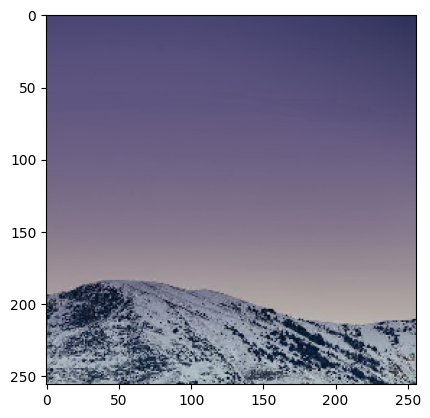

Class Predictions:
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot: 1.50%
Corn_Common_Rust: 0.15%
Corn_Healthy: 0.00%
Corn_Northern_Leaf_Blight: 0.55%
Not_Corn_Clean: 97.80%

Highest Prediction: Not_Corn_Clean: 97.80%


In [ ]:
labels = list(train_generator.class_indices.keys())
upload = files.upload()

for fn in upload.keys():
    # Image Prediction
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = my_model.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Finding the class with the highest percentage
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("Class Predictions:")
    for label, percentage in zip(labels, predictions * 100):
        print("{}: {:.2f}%".format(label, percentage))
    print("\nHighest Prediction: {}: {:.2f}%".format(max_label, max_percentage))

### **Saving Model 1**

In [ ]:
my_model.save("corn_model_1.h5")
tf.keras.models.save_model(my_model, 'corn_model_1.hdf5')

## **Building Model (Model 2)**

In [2]:
finaldata_dir = "/content/finaldata"
img_dim = 256
img_shape = (256, 256, 3)

datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.15)

train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3825 images belonging to 5 classes.
Found 673 images belonging to 5 classes.


In [3]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)

name_classes = labels
num_labels = len(labels)

print("Labels: {}".format(name_classes))
print("Num labels: {}".format(num_labels))

Labels: ['Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot', 'Corn_Common_Rust', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Not_Corn_Clean']
Num labels: 5


### **Initialization**

In [4]:
# Defining callbacks for EarlyStopping and ModelCheckpoint
def my_callbacks(filename):
    es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
    mc = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

    return [es, mc]

# Defining method for plotting learning curves
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(6, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()), 1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, 1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.show()

# Defining CM 
def conf_matrix(y_test, y_pred, name_classes):
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
    ax.set_title('Confusion Matrix with Labels')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.xaxis.set_ticklabels(name_classes, rotation=45)
    ax.yaxis.set_ticklabels(name_classes, rotation=45)
    plt.show()

# Defining CR
def class_report(y_test, y_pred, name_classes):
    print("Labels:", name_classes)
    print()
    print(classification_report(y_test, y_pred))

# Save model history method
def saved_model_history(modelname, history, saved_model_his):
    with open(os.path.join(saved_model_his, modelname), 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

### **Model Architecture**

In [5]:
my_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

my_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [6]:
# Compile Model
my_model_2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
     

# Training Model
history2 = my_model_2.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = my_callbacks("best_Model2.h5"),
)

Epoch 1/50
39/39 [==============================] - ETA: 0s - loss: 0.8699 - accuracy: 0.6484 
Epoch 1: val_accuracy improved from -inf to 0.84398, saving model to best_OwnModel.h5
39/39 [==============================] - 535s 14s/step - loss: 0.8699 - accuracy: 0.6484 - val_loss: 0.4547 - val_accuracy: 0.8440
Epoch 2/50
39/39 [==============================] - ETA: 0s - loss: 0.3297 - accuracy: 0.8706 
Epoch 2: val_accuracy improved from 0.84398 to 0.89599, saving model to best_OwnModel.h5
39/39 [==============================] - 485s 12s/step - loss: 0.3297 - accuracy: 0.8706 - val_loss: 0.2315 - val_accuracy: 0.8960
Epoch 3/50
39/39 [==============================] - ETA: 0s - loss: 0.1983 - accuracy: 0.9148 
Epoch 3: val_accuracy improved from 0.89599 to 0.93462, saving model to best_OwnModel.h5
39/39 [==============================] - 490s 13s/step - loss: 0.1983 - accuracy: 0.9148 - val_loss: 0.1794 - val_accuracy: 0.9346
Epoch 4/50
39/39 [==============================] - ETA: 0

In [7]:
# Evaluate Model
test_loss, test_accuracy = my_model_2.evaluate(validation_generator, steps=len(validation_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 40s 5s/step - loss: 0.2727 - accuracy: 0.9480
Test Loss: 0.27271974086761475
Test Accuracy: 0.9479940533638


### **Visualization of Accuracy and Loss & Confusion Matrix**

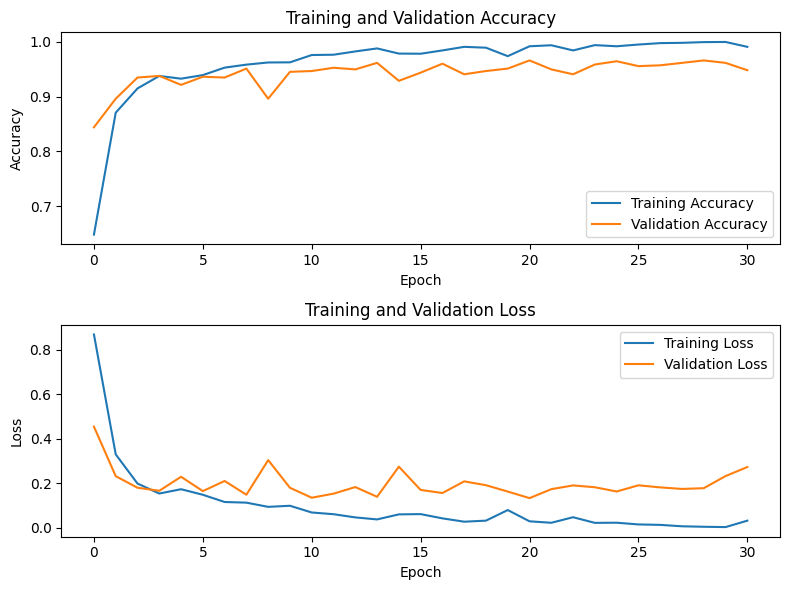

In [11]:
# Plotting Accuracy and Loss
plt.figure(figsize=(8, 6))

# Plotting Accuracy
plt.subplot(2, 1, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(2, 1, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Maintain spacing between subplots
plt.tight_layout()
plt.show()

<ipython-input-14-c19572da45c2>:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = my_model_2.predict_generator(validation_generator)


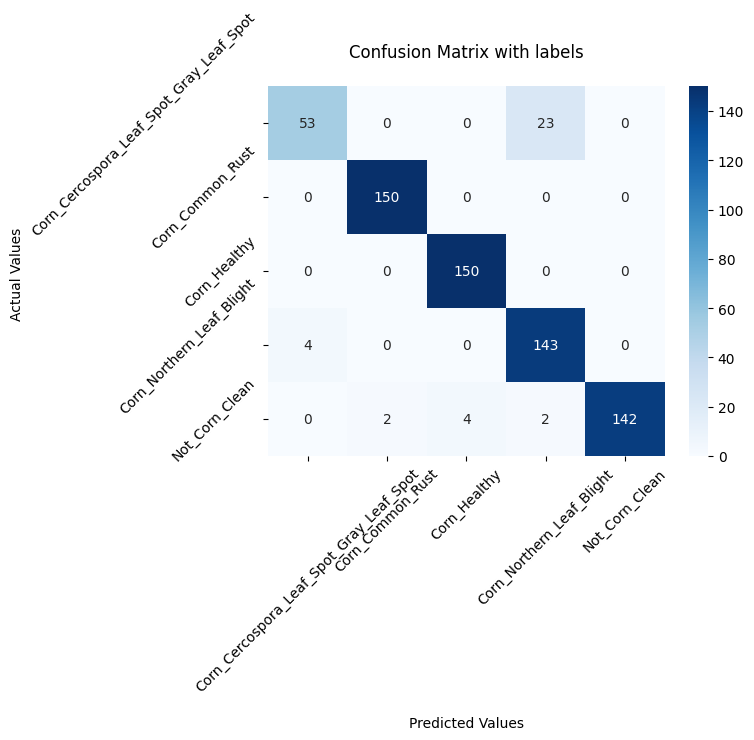

In [14]:
# Confusion Matrix
def conf_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(name_classes, rotation=45)
  ax.yaxis.set_ticklabels(name_classes, rotation=45)

  plt.show()

y_test = validation_generator.classes
y_pred = my_model_2.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)
conf_matrix(y_test, y_pred)

### **Testing Prediction using Model 2**

Saving Corn_Common_Rust_55.jpg to Corn_Common_Rust_55.jpg
1/1 [==============================] - 0s 48ms/step


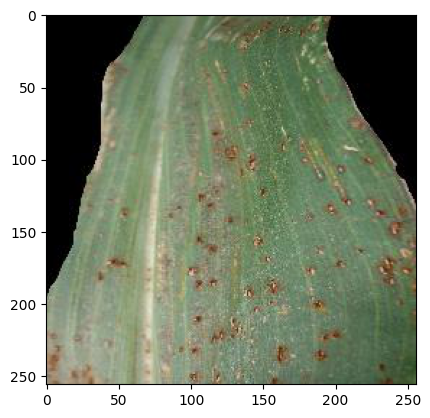

Class Predictions:
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot: 0.00%
Corn_Common_Rust: 100.00%
Corn_Healthy: 0.00%
Corn_Northern_Leaf_Blight: 0.00%
Not_Corn_Clean: 0.00%

Highest Prediction: Corn_Common_Rust: 100.00%


In [19]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image

labels = list(train_generator.class_indices.keys())
upload = files.upload()

for fn in upload.keys():
    # Image Prediction
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = my_model_2.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Finding the class with the highest percentage
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("Class Predictions:")
    for label, percentage in zip(labels, predictions * 100):
        print("{}: {:.2f}%".format(label, percentage))
    print("\nHighest Prediction: {}: {:.2f}%".format(max_label, max_percentage))

Saving bg.jpg to bg.jpg
1/1 [==============================] - 0s 50ms/step


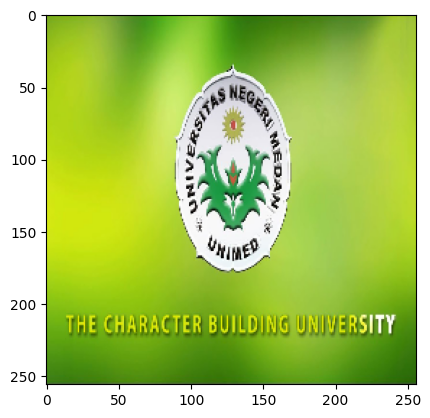

Class Predictions:
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot: 0.00%
Corn_Common_Rust: 0.00%
Corn_Healthy: 0.00%
Corn_Northern_Leaf_Blight: 0.00%
Not_Corn_Clean: 100.00%

Highest Prediction: Not_Corn_Clean: 100.00%


In [23]:
labels = list(train_generator.class_indices.keys())
upload = files.upload()

for fn in upload.keys():
    # Image Prediction
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = my_model_2.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Finding the class with the highest percentage
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("Class Predictions:")
    for label, percentage in zip(labels, predictions * 100):
        print("{}: {:.2f}%".format(label, percentage))
    print("\nHighest Prediction: {}: {:.2f}%".format(max_label, max_percentage))

### **Saving Model 2**

In [30]:
my_model_2.save("corn_model_2.h5")
tf.keras.models.save_model(my_model_2, 'corn_model_2.hdf5')